In [ ]:
import math

def p0(y, n):
    while n>=1:
      return ((y**n)/(math.factorial(n)))+p0(y, n-1)
    if n == 0:
      return 1

n = int(input("Введите количество каналов n: "))
λ = float(input("Введите интенсивность λ: "))
t = float(input("Введите среднее время подготовки t: "))
ρ = float(input("Введите среднее время работы ρ: "))

ῦ = t*ρ/(ρ+t)
y = λ/ῦ
P0 = (p0(y, n))**(-1)
P_otk = ((y**n)/(math.factorial(2)))*P0
Q = 1 - ((y**n)/(math.factorial(n)))*P0
A = λ*Q
kazan = A / ῦ

print("\nОтносительная эффективность Q -", round(Q, 2),
      "\nАбсолютная эффективность A -", round(A, 2),
      "\nСреднее число занятых каналов kazan -", round(kazan, 2)
)

Введите количество каналов n: 2
Введите интенсивность λ: 0.2
Введите среднее время подготовки t: 0.5
Введите среднее время работы ρ: 2

Относительная эффективность Q - 0.92 
Абсолютная эффективность A - 0.18 
Среднее число занятых каналов kazan - 0.46


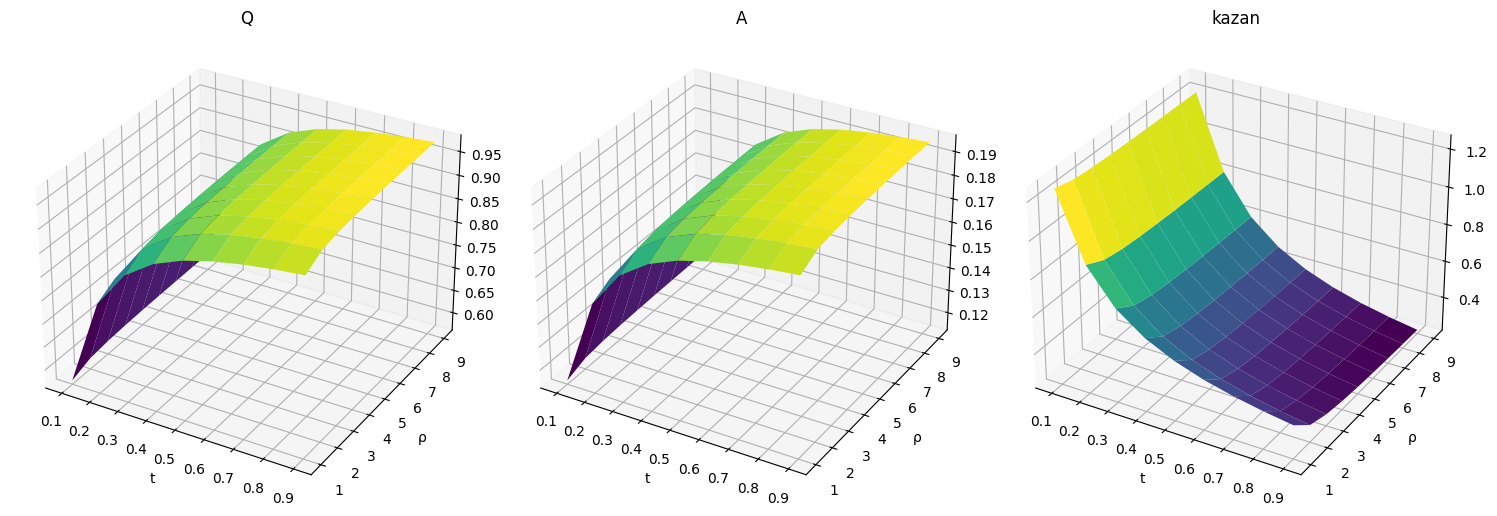

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

λ = 0.2
n = 2

def get_params(t, ρ):
  ῦ = t*ρ/(ρ+t)
  y = λ/ῦ
  P0 = (p0(y, n))**(-1)
  P_otk = ((y**n)/(math.factorial(2)))*P0
  Q = 1 - ((y**n)/(math.factorial(n)))*P0
  A = λ*Q
  kazan = A / ῦ
  return Q, A, kazan

Nr = np.arange(0.1, 1, 0.1)
Mr = np.arange(1, 10, 1)
N, M = np.meshgrid(Nr, Mr)

Q, A, kazan = np.vectorize(get_params)(N, M)
values_list = [Q, A, kazan]
names = ['Q',
         'A',
         'kazan']

fig = plt.figure(figsize=(15, 15))

for i, values in enumerate(values_list):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    z_values = values
    ax.plot_surface(N, M, z_values, cmap='viridis')
    ax.set_xlabel('t')
    ax.set_ylabel('ρ')
    ax.set_title(names[i])

plt.tight_layout()
plt.show()